## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9720484	total: 48.4ms	remaining: 48.4s
1:	learn: 0.9507566	total: 49.7ms	remaining: 24.8s
2:	learn: 0.9298440	total: 50.7ms	remaining: 16.8s
3:	learn: 0.9124777	total: 51.7ms	remaining: 12.9s
4:	learn: 0.8951378	total: 52.8ms	remaining: 10.5s
5:	learn: 0.8780495	total: 54ms	remaining: 8.95s
6:	learn: 0.8624608	total: 55ms	remaining: 7.8s
7:	learn: 0.8466015	total: 56ms	remaining: 6.94s
8:	learn: 0.8305759	total: 57ms	remaining: 6.27s
9:	learn: 0.8142970	total: 58ms	remaining: 5.74s
10:	learn: 0.7999130	total: 58.9ms	remaining: 5.3s
11:	learn: 0.7858663	total: 60ms	remaining: 4.94s
12:	learn: 0.7706632	total: 61ms	remaining: 4.63s
13:	learn: 0.7560032	total: 62ms	remaining: 4.37s
14:	learn: 0.7435917	total: 63.1ms	remaining: 4.14s
15:	learn: 0.7293001	total: 64ms	remaining: 3.94s
16:	learn: 0.7150322	total: 65.1ms	remaining: 3.77s
17:	learn: 0.7034448	total: 66.1ms	remaining: 3.6s
18:	learn: 0.6912066	total: 67ms	remaining: 3.46s
19:	learn: 0.678

86:	learn: 0.3315473	total: 142ms	remaining: 1.49s
87:	learn: 0.3293458	total: 144ms	remaining: 1.49s
88:	learn: 0.3271385	total: 145ms	remaining: 1.48s
89:	learn: 0.3248454	total: 146ms	remaining: 1.47s
90:	learn: 0.3230217	total: 147ms	remaining: 1.47s
91:	learn: 0.3211719	total: 148ms	remaining: 1.46s
92:	learn: 0.3195729	total: 149ms	remaining: 1.45s
93:	learn: 0.3176098	total: 150ms	remaining: 1.45s
94:	learn: 0.3156375	total: 151ms	remaining: 1.44s
95:	learn: 0.3141315	total: 152ms	remaining: 1.43s
96:	learn: 0.3124892	total: 153ms	remaining: 1.43s
97:	learn: 0.3108835	total: 154ms	remaining: 1.42s
98:	learn: 0.3090897	total: 155ms	remaining: 1.41s
99:	learn: 0.3067966	total: 156ms	remaining: 1.41s
100:	learn: 0.3050373	total: 157ms	remaining: 1.4s
101:	learn: 0.3032276	total: 158ms	remaining: 1.39s
102:	learn: 0.3015721	total: 159ms	remaining: 1.38s
103:	learn: 0.2998551	total: 160ms	remaining: 1.38s
104:	learn: 0.2984562	total: 161ms	remaining: 1.37s
105:	learn: 0.2968550	total

216:	learn: 0.2031717	total: 278ms	remaining: 1s
217:	learn: 0.2027753	total: 279ms	remaining: 1s
218:	learn: 0.2021139	total: 280ms	remaining: 1s
219:	learn: 0.2016611	total: 282ms	remaining: 1000ms
220:	learn: 0.2014115	total: 283ms	remaining: 998ms
221:	learn: 0.2008376	total: 284ms	remaining: 995ms
222:	learn: 0.2004785	total: 285ms	remaining: 993ms
223:	learn: 0.2001541	total: 286ms	remaining: 990ms
224:	learn: 0.1996752	total: 287ms	remaining: 988ms
225:	learn: 0.1993162	total: 288ms	remaining: 986ms
226:	learn: 0.1987125	total: 289ms	remaining: 984ms
227:	learn: 0.1981483	total: 290ms	remaining: 982ms
228:	learn: 0.1976738	total: 291ms	remaining: 980ms
229:	learn: 0.1973678	total: 292ms	remaining: 978ms
230:	learn: 0.1964983	total: 293ms	remaining: 975ms
231:	learn: 0.1960587	total: 294ms	remaining: 973ms
232:	learn: 0.1954263	total: 295ms	remaining: 971ms
233:	learn: 0.1948077	total: 296ms	remaining: 969ms
234:	learn: 0.1944596	total: 297ms	remaining: 967ms
235:	learn: 0.194202

346:	learn: 0.1493577	total: 412ms	remaining: 776ms
347:	learn: 0.1491365	total: 413ms	remaining: 774ms
348:	learn: 0.1488978	total: 414ms	remaining: 773ms
349:	learn: 0.1486809	total: 415ms	remaining: 771ms
350:	learn: 0.1484170	total: 416ms	remaining: 770ms
351:	learn: 0.1481959	total: 417ms	remaining: 768ms
352:	learn: 0.1477787	total: 418ms	remaining: 767ms
353:	learn: 0.1474791	total: 419ms	remaining: 765ms
354:	learn: 0.1470367	total: 421ms	remaining: 764ms
355:	learn: 0.1466779	total: 422ms	remaining: 763ms
356:	learn: 0.1465020	total: 423ms	remaining: 761ms
357:	learn: 0.1463100	total: 424ms	remaining: 760ms
358:	learn: 0.1461340	total: 425ms	remaining: 758ms
359:	learn: 0.1457736	total: 426ms	remaining: 757ms
360:	learn: 0.1456182	total: 427ms	remaining: 756ms
361:	learn: 0.1452400	total: 428ms	remaining: 754ms
362:	learn: 0.1448724	total: 429ms	remaining: 753ms
363:	learn: 0.1446074	total: 430ms	remaining: 751ms
364:	learn: 0.1443701	total: 431ms	remaining: 750ms
365:	learn: 

474:	learn: 0.1154001	total: 542ms	remaining: 599ms
475:	learn: 0.1152329	total: 543ms	remaining: 598ms
476:	learn: 0.1149642	total: 544ms	remaining: 597ms
477:	learn: 0.1148336	total: 545ms	remaining: 596ms
478:	learn: 0.1147105	total: 546ms	remaining: 594ms
479:	learn: 0.1146213	total: 547ms	remaining: 593ms
480:	learn: 0.1143445	total: 548ms	remaining: 592ms
481:	learn: 0.1142233	total: 549ms	remaining: 590ms
482:	learn: 0.1138924	total: 550ms	remaining: 589ms
483:	learn: 0.1136799	total: 551ms	remaining: 588ms
484:	learn: 0.1134768	total: 552ms	remaining: 587ms
485:	learn: 0.1133238	total: 553ms	remaining: 585ms
486:	learn: 0.1130554	total: 555ms	remaining: 584ms
487:	learn: 0.1128461	total: 556ms	remaining: 583ms
488:	learn: 0.1125548	total: 556ms	remaining: 582ms
489:	learn: 0.1124589	total: 557ms	remaining: 580ms
490:	learn: 0.1122926	total: 559ms	remaining: 579ms
491:	learn: 0.1121489	total: 560ms	remaining: 578ms
492:	learn: 0.1118975	total: 561ms	remaining: 577ms
493:	learn: 

606:	learn: 0.0911435	total: 677ms	remaining: 438ms
607:	learn: 0.0909786	total: 678ms	remaining: 437ms
608:	learn: 0.0908457	total: 680ms	remaining: 436ms
609:	learn: 0.0905803	total: 681ms	remaining: 435ms
610:	learn: 0.0904077	total: 682ms	remaining: 434ms
611:	learn: 0.0902392	total: 683ms	remaining: 433ms
612:	learn: 0.0900087	total: 684ms	remaining: 432ms
613:	learn: 0.0898960	total: 685ms	remaining: 430ms
614:	learn: 0.0897079	total: 686ms	remaining: 429ms
615:	learn: 0.0895035	total: 687ms	remaining: 428ms
616:	learn: 0.0893539	total: 688ms	remaining: 427ms
617:	learn: 0.0892896	total: 689ms	remaining: 426ms
618:	learn: 0.0890862	total: 690ms	remaining: 425ms
619:	learn: 0.0890286	total: 691ms	remaining: 424ms
620:	learn: 0.0888577	total: 692ms	remaining: 423ms
621:	learn: 0.0887940	total: 693ms	remaining: 421ms
622:	learn: 0.0887172	total: 694ms	remaining: 420ms
623:	learn: 0.0886002	total: 695ms	remaining: 419ms
624:	learn: 0.0884525	total: 696ms	remaining: 418ms
625:	learn: 

729:	learn: 0.0752936	total: 810ms	remaining: 300ms
730:	learn: 0.0751217	total: 812ms	remaining: 299ms
731:	learn: 0.0749318	total: 813ms	remaining: 298ms
732:	learn: 0.0748098	total: 814ms	remaining: 297ms
733:	learn: 0.0747912	total: 815ms	remaining: 295ms
734:	learn: 0.0747644	total: 816ms	remaining: 294ms
735:	learn: 0.0747072	total: 817ms	remaining: 293ms
736:	learn: 0.0745794	total: 818ms	remaining: 292ms
737:	learn: 0.0744675	total: 819ms	remaining: 291ms
738:	learn: 0.0744084	total: 820ms	remaining: 290ms
739:	learn: 0.0742340	total: 821ms	remaining: 289ms
740:	learn: 0.0741017	total: 822ms	remaining: 287ms
741:	learn: 0.0739522	total: 823ms	remaining: 286ms
742:	learn: 0.0738350	total: 824ms	remaining: 285ms
743:	learn: 0.0736401	total: 825ms	remaining: 284ms
744:	learn: 0.0735192	total: 826ms	remaining: 283ms
745:	learn: 0.0733148	total: 827ms	remaining: 282ms
746:	learn: 0.0731843	total: 828ms	remaining: 281ms
747:	learn: 0.0730621	total: 829ms	remaining: 279ms
748:	learn: 

855:	learn: 0.0629613	total: 941ms	remaining: 158ms
856:	learn: 0.0628579	total: 942ms	remaining: 157ms
857:	learn: 0.0627306	total: 943ms	remaining: 156ms
858:	learn: 0.0626510	total: 944ms	remaining: 155ms
859:	learn: 0.0625262	total: 945ms	remaining: 154ms
860:	learn: 0.0624401	total: 946ms	remaining: 153ms
861:	learn: 0.0623679	total: 947ms	remaining: 152ms
862:	learn: 0.0622661	total: 948ms	remaining: 151ms
863:	learn: 0.0621527	total: 949ms	remaining: 149ms
864:	learn: 0.0620038	total: 950ms	remaining: 148ms
865:	learn: 0.0618782	total: 951ms	remaining: 147ms
866:	learn: 0.0618012	total: 952ms	remaining: 146ms
867:	learn: 0.0617153	total: 953ms	remaining: 145ms
868:	learn: 0.0616164	total: 954ms	remaining: 144ms
869:	learn: 0.0615294	total: 955ms	remaining: 143ms
870:	learn: 0.0614529	total: 957ms	remaining: 142ms
871:	learn: 0.0613482	total: 958ms	remaining: 141ms
872:	learn: 0.0612341	total: 959ms	remaining: 139ms
873:	learn: 0.0611482	total: 960ms	remaining: 138ms
874:	learn: 

990:	learn: 0.0514262	total: 1.08s	remaining: 9.79ms
991:	learn: 0.0513779	total: 1.08s	remaining: 8.7ms
992:	learn: 0.0512603	total: 1.08s	remaining: 7.61ms
993:	learn: 0.0511494	total: 1.08s	remaining: 6.53ms
994:	learn: 0.0510441	total: 1.08s	remaining: 5.44ms
995:	learn: 0.0509366	total: 1.08s	remaining: 4.35ms
996:	learn: 0.0508087	total: 1.08s	remaining: 3.26ms
997:	learn: 0.0507157	total: 1.08s	remaining: 2.17ms
998:	learn: 0.0506626	total: 1.09s	remaining: 1.09ms
999:	learn: 0.0505889	total: 1.09s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

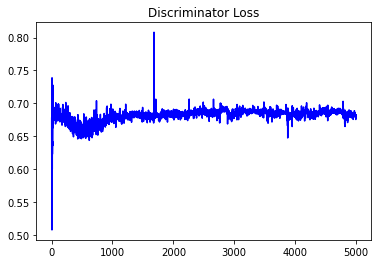

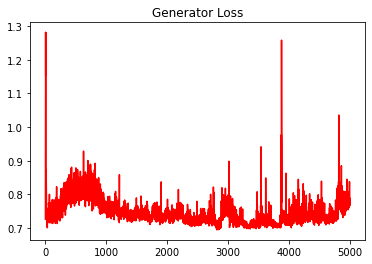

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

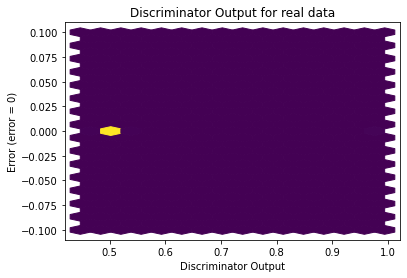

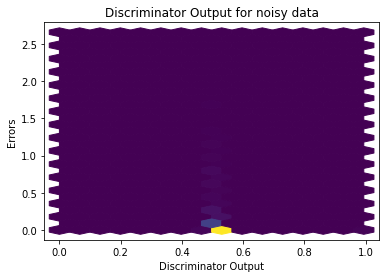

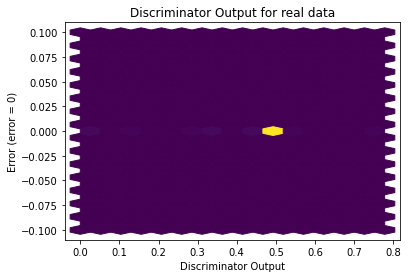

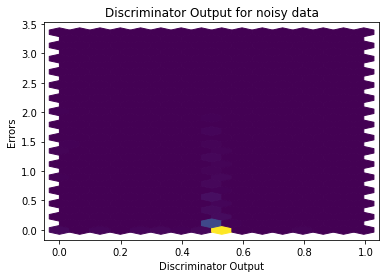

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


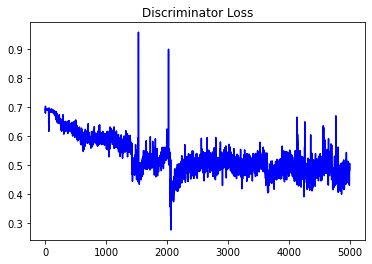

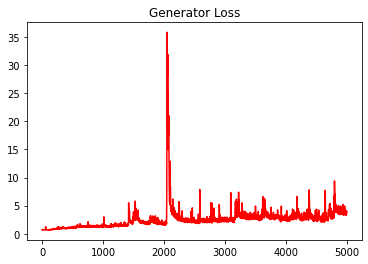

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

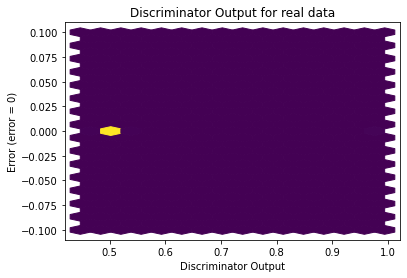

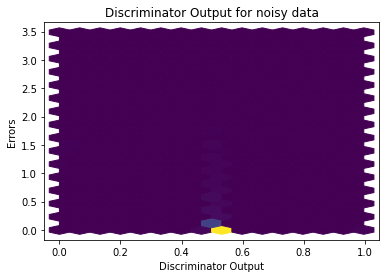

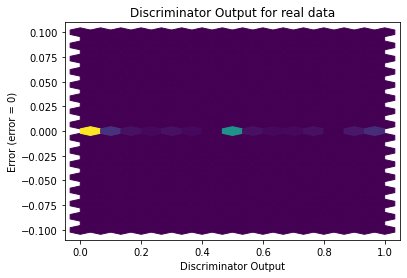

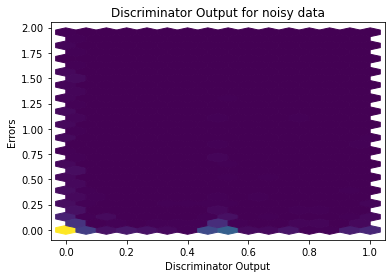

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9676]], device='cuda:0', requires_grad=True)
